In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive

        drive.mount("/content/drive")
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [4]:
import os
import sys
from pathlib import Path

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [5]:
# haotian comp
import os
import sys
from pathlib import Path

if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("working dir:", workding_dir)

working dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [6]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

## Matplotlib cannot find basic fonts

https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts

I am in macOS with jupyter notebook, I solved with the following, first close your jupyter notebook. Then find out the font path by doing the following in Python

import matplotlib
print(matplotlib.matplotlib_fname())
it prints /Users/zyy/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc for me, notice matplotlibrc is a file, not a directory.

Then download font SimHei, and copy it to the directory fonts/ttf under the mpl-data/ directory above.

Delete directory ～/.cache/matplotlib and restart your jupyter notebook, everything should be good.

In [7]:
import matplotlib
from llm_toolkit.logical_reasoning_utils import *
print(matplotlib.matplotlib_fname())


loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc


In [8]:
model_orders = {
    # "Mistral-7B-v0.3-Chinese-Chat": 5,
    "internlm2_5-7b-chat": 9,
    "internlm2_5-7b-chat-1m": 10,
    "internlm2_5-20b-chat": 11,
    "Qwen2-7B-Instruct": 20,
    "Qwen2-72B-Instruct": 25,
    "Llama3.1-8B-Chinese-Chat": 30,
    "Llama3.1-70B-Chinese-Chat": 40,
    "gpt-4o-mini": 90,
    "o1-mini": 91,
    "gpt-4o": 95,
    "o1-preview": 100,
}

In [9]:
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
model_markers = {k: markers[i] for i, k in enumerate(model_orders.keys())}

In [10]:
import pandas as pd

df_openai = pd.read_csv("data/openai_results.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  3000 non-null   object
 1   label                 3000 non-null   object
 2   title                 3000 non-null   object
 3   puzzle                3000 non-null   object
 4   truth                 3000 non-null   object
 5   gpt-4o-mini/shots-00  3000 non-null   object
 6   gpt-4o-mini/shots-05  3000 non-null   object
 7   gpt-4o-mini/shots-10  3000 non-null   object
 8   gpt-4o-mini/shots-20  3000 non-null   object
 9   gpt-4o-mini/shots-30  3000 non-null   object
 10  gpt-4o-mini/shots-40  3000 non-null   object
 11  gpt-4o-mini/shots-50  3000 non-null   object
 12  gpt-4o/shots-00       3000 non-null   object
 13  gpt-4o/shots-05       3000 non-null   object
 14  gpt-4o/shots-10       3000 non-null   object
 15  gpt-4o/shots-20       3000 non-null   

In [11]:
df_best = df_openai[
    [
        "text",
        "label",
        "title",
        "puzzle",
        "truth",
    ]
].copy()

In [12]:
import pandas as pd

perf_df = None
model_perf_dfs = {}
for model_name in model_orders.keys():
    metrics_csv = f"data/{model_name}_metrics.csv"
    if not Path(metrics_csv).exists():
        continue
    df = pd.read_csv(metrics_csv)
    
    best_f1 = df["f1"].idxmax()
    print(
        f"Best F1 for {model_name} @ {df['epoch'].iloc[best_f1]:.2f} epoch & {df['run'].iloc[best_f1]} run: {df['f1'].iloc[best_f1]}"
    )    

    model_perf_dfs[model_name] = df
    perf_df = df if perf_df is None else pd.concat([perf_df, df])

perf_df

Best F1 for internlm2_5-7b-chat @ 0.80 epoch & internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf run: 0.7660159670998776
Best F1 for internlm2_5-7b-chat-1m @ 0.80 epoch & internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf run: 0.8028064320197301
Best F1 for internlm2_5-20b-chat @ 0.80 epoch & internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf run: 0.8027552955647029
Best F1 for Qwen2-7B-Instruct @ 0.40 epoch & Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf run: 0.7748745026535183
Best F1 for Qwen2-72B-Instruct @ 1.80 epoch & Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf run: 0.804194683154365
Best F1 for Llama3.1-8B-Chinese-Chat @ 1.00 epoch & shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf run: 0.7924651054056209
Best F1 for Llama3.1-70B-Chinese-Chat @ 1.00 epoch & shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf run: 0.8076868978089201


epoch                      model  \
0     0.0        internlm2_5-7b-chat   
1     0.2        internlm2_5-7b-chat   
2     0.4        internlm2_5-7b-chat   
3     0.6        internlm2_5-7b-chat   
4     0.8        internlm2_5-7b-chat   
..    ...                        ...   
6     1.2  Llama3.1-70B-Chinese-Chat   
7     1.4  Llama3.1-70B-Chinese-Chat   
8     1.6  Llama3.1-70B-Chinese-Chat   
9     1.8  Llama3.1-70B-Chinese-Chat   
10    2.0  Llama3.1-70B-Chinese-Chat   

                                                  run  accuracy  precision  \
0      internlm/internlm2_5-7b-chat_torch.bfloat16_lf  0.705000   0.739804   
1   internlm/internlm2_5-7b-chat/checkpoint-35_tor...  0.719333   0.786349   
2   internlm/internlm2_5-7b-chat/checkpoint-70_tor...  0.726000   0.790025   
3   internlm/internlm2_5-7b-chat/checkpoint-105_to...  0.673667   0.804457   
4   internlm/internlm2_5-7b-chat/checkpoint-140_to...  0.749667   0.804187   
..                                                ...       ...        ...   
6   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.732667   0.826535   
7   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.755667   0.825899   
8   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.757000   0.826446   
9   shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.754667   0.827772   
10  shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpo...  0.749667   0.828231   

      recall        f1  ratio_valid_classifications  
0   0.705000  0.690636                          1.0  
1   0.719333  0.733050                          1.0  
2   0.726000  0.739658                          1.0  
3   0.673667  0.710412                          1.0  
4   0.749667  0.766016                          1.0  
..       ...       ...                          ...  
6   0.732667  0.764442                          1.0  
7   0.755667  0.782041                          1.0  
8   0.757000  0.783450                          1.0  
9   0.754667  0.782358                          1.0  
10  0.749667  0.779195                          1.0  

[77 rows x 8 columns]

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_perf(
    model_perf_dfs,
    model_markers,
    x_major_locator=0.2,
    y_offset=0.005,
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    for model_name, perf_df in model_perf_dfs.items():
        # Ensure the lengths of perf_df["epoch"], perf_df["accuracy"], and perf_df["f1"] are the same
        min_length = min(len(perf_df["epoch"]), len(perf_df["accuracy"]), len(perf_df["f1"]))
        perf_df = perf_df.iloc[:min_length]

        (line,) = ax.plot(
            perf_df["epoch"],
            perf_df["f1"],
            marker=model_markers[model_name],
            label=model_name,
        )

        line_color = line.get_color()

        best_f1 = perf_df["f1"].idxmax()
        print(
            f"Best F1 for {model_name} @ {perf_df['epoch'].iloc[best_f1]:.1f} epoch & {perf_df['run'].iloc[best_f1]} run: {perf_df['f1'].iloc[best_f1]}"
        )
        ax.annotate(
            f"{perf_df['f1'].iloc[best_f1]*100:.2f}%",
            (perf_df["epoch"].iloc[best_f1], perf_df["f1"].iloc[best_f1]),
            ha="center",
            va="bottom",
            xytext=(0, 0),
            textcoords="offset points",
            fontsize=10,
            color=line_color,
        )

        df = pd.read_csv(f"data/{model_name}_results.csv")
        df_best[f"{model_name} ({perf_df['epoch'].iloc[best_f1]:.1f}-epoch)"] = df[perf_df['run'].iloc[best_f1]].apply(extract_answer)

    # Set y-axis limit
    y_scales = ax.get_ylim()
    ax.set_ylim(y_scales[0], y_scales[1] + y_offset)

    # Add title and labels
    ax.set_xlabel("Epoch (0: base model, 0.2 - 2: fine-tuned models)")
    ax.set_ylabel("F1 Score")

    # Set x-axis grid spacing to 0.2
    ax.xaxis.set_major_locator(MultipleLocator(x_major_locator))
    ax.set_title(
        "Performance Analysis Across Checkpoints for Models"
    )

    # Rotate x labels
    plt.xticks(rotation=0)
    plt.grid(True)
    # plt.tight_layout()

    # Set legend at the right to avoid overlapping with lines
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

    plt.show()

Best F1 for internlm2_5-7b-chat @ 0.8 epoch & internlm/internlm2_5-7b-chat/checkpoint-140_torch.bfloat16_lf run: 0.7660159670998776
Best F1 for internlm2_5-7b-chat-1m @ 0.8 epoch & internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf run: 0.8028064320197301
Best F1 for internlm2_5-20b-chat @ 0.8 epoch & internlm/internlm2_5-20b-chat/checkpoint-140_torch.bfloat16_4bit_lf run: 0.8027552955647029
Best F1 for Qwen2-7B-Instruct @ 0.4 epoch & Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf run: 0.7748745026535183
Best F1 for Qwen2-72B-Instruct @ 1.8 epoch & Qwen/Qwen2-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf run: 0.804194683154365
Best F1 for Llama3.1-8B-Chinese-Chat @ 1.0 epoch & shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf run: 0.7924651054056209
Best F1 for Llama3.1-70B-Chinese-Chat @ 1.0 epoch & shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-175_torch.bfloat16_4bit_lf run: 0.8076868978089201


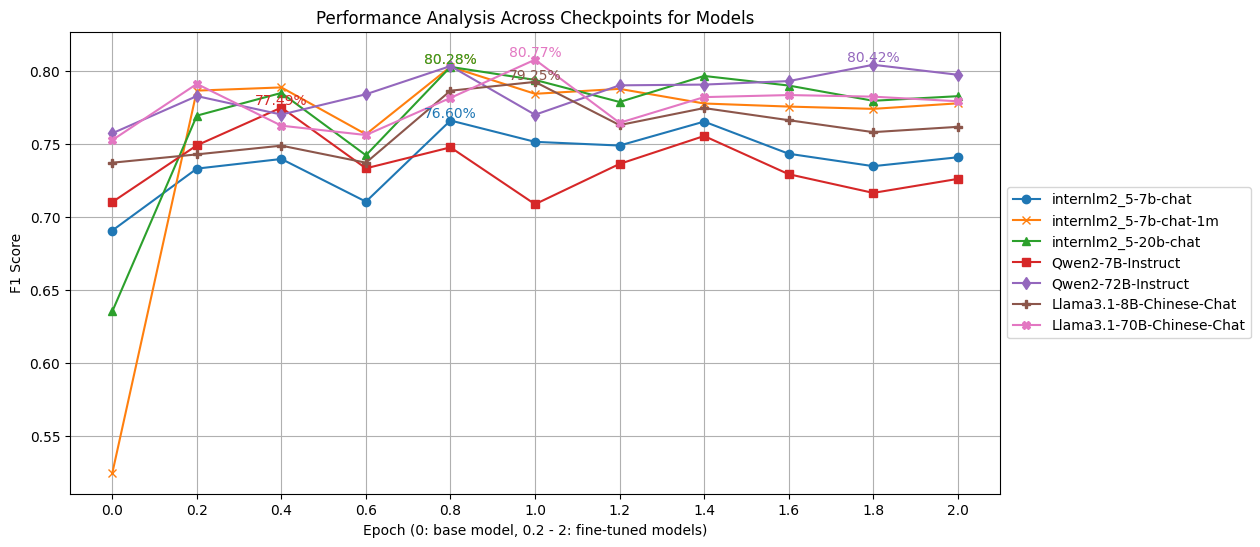

In [14]:
plot_perf(model_perf_dfs, model_markers)

In [15]:
models = [m for m in model_orders.keys()]
models[-4:]

['gpt-4o-mini', 'o1-mini', 'gpt-4o', 'o1-preview']

In [16]:
import pandas as pd

perf_df_shots = None
model_perf_dfs = {}

for model_name in models:
    metrics_csv = "data/openai_metrics.csv" if model_name in models[-4:] else f"data/{model_name}_shots_metrics.csv"
    if not Path(metrics_csv).exists():
        continue
    df = pd.read_csv(metrics_csv)
    df = df[df["model"] == model_name].reset_index(drop=True)
    
    best_f1 = df["f1"].idxmax()
    print(
        f"Best F1 for {model_name} @ {df['shots'].iloc[best_f1]}-shot & {df['run'].iloc[best_f1]}: {df['f1'].iloc[best_f1]}"
    )    

    model_perf_dfs[model_name] = df
    perf_df_shots = df if perf_df_shots is None else pd.concat([perf_df_shots, df])

    if model_name in models[-4:]:
        df_best[f"{model_name} ({df['shots'].iloc[best_f1]}-shot)"] = df_openai[df['run'].iloc[best_f1]].apply(extract_answer)

perf_df_shots

Best F1 for internlm2_5-7b-chat @ 0-shot & internlm/internlm2_5-7b-chat/shots-00: 0.6906357423169466
Best F1 for internlm2_5-7b-chat-1m @ 10-shot & internlm/internlm2_5-7b-chat-1m/shots-10: 0.665824871588245
Best F1 for internlm2_5-20b-chat @ 0-shot & internlm/internlm2_5-20b-chat/shots-00: 0.6352190975436365
Best F1 for Qwen2-7B-Instruct @ 0-shot & Qwen/Qwen2-7B-Instruct/shots-00: 0.710140098232232
Best F1 for Qwen2-72B-Instruct @ 0-shot & Qwen/Qwen2-72B-Instruct_torch/shots-00: 0.7572499605227642
Best F1 for Llama3.1-8B-Chinese-Chat @ 0-shot & shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00: 0.7371050181385632
Best F1 for Llama3.1-70B-Chinese-Chat @ 10-shot & shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10: 0.756682017266956
Best F1 for gpt-4o-mini @ 0-shot & gpt-4o-mini/shots-00: 0.7296061848734905
Best F1 for o1-mini @ 20-shot & o1-mini/shots-20: 0.7535300565051624
Best F1 for gpt-4o @ 10-shot & gpt-4o/shots-10: 0.803614688453356
Best F1 for o1-preview @ 50-shot & o1-preview/shots-5

shots                      model  \
0      0        internlm2_5-7b-chat   
1     10        internlm2_5-7b-chat   
0      0     internlm2_5-7b-chat-1m   
1     10     internlm2_5-7b-chat-1m   
0      0       internlm2_5-20b-chat   
0      0          Qwen2-7B-Instruct   
1     10          Qwen2-7B-Instruct   
0      0         Qwen2-72B-Instruct   
0      0   Llama3.1-8B-Chinese-Chat   
1     10   Llama3.1-8B-Chinese-Chat   
0      0  Llama3.1-70B-Chinese-Chat   
1      5  Llama3.1-70B-Chinese-Chat   
2     10  Llama3.1-70B-Chinese-Chat   
3     20  Llama3.1-70B-Chinese-Chat   
0      0                gpt-4o-mini   
1      5                gpt-4o-mini   
2     10                gpt-4o-mini   
3     20                gpt-4o-mini   
4     30                gpt-4o-mini   
5     40                gpt-4o-mini   
6     50                gpt-4o-mini   
0      0                    o1-mini   
1      5                    o1-mini   
2     10                    o1-mini   
3     20                    o1-mini   
0      0                     gpt-4o   
1      5                     gpt-4o   
2     10                     gpt-4o   
3     20                     gpt-4o   
4     30                     gpt-4o   
5     40                     gpt-4o   
6     50                     gpt-4o   
0      0                 o1-preview   
1      5                 o1-preview   
2     10                 o1-preview   
3     20                 o1-preview   
4     30                 o1-preview   
5     40                 o1-preview   
6     50                 o1-preview   

                                               run  accuracy  precision  \
0            internlm/internlm2_5-7b-chat/shots-00  0.705000   0.739804   
1            internlm/internlm2_5-7b-chat/shots-10  0.553333   0.730174   
0         internlm/internlm2_5-7b-chat-1m/shots-00  0.481333   0.760525   
1         internlm/internlm2_5-7b-chat-1m/shots-10  0.647333   0.728207   
0           internlm/internlm2_5-20b-chat/shots-00  0.564000   0.774526   
0                  Qwen/Qwen2-7B-Instruct/shots-00  0.683000   0.749310   
1                  Qwen/Qwen2-7B-Instruct/shots-10  0.564667   0.739120   
0           Qwen/Qwen2-72B-Instruct_torch/shots-00  0.751667   0.794938   
0   shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00  0.742000   0.747706   
1   shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10  0.667667   0.783408   
0  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-00  0.763667   0.780665   
1  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-05  0.753667   0.772126   
2  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-10  0.754000   0.772948   
3  shenzhi-wang/Llama3.1-70B-Chinese-Chat/shots-20  0.738000   0.756694   
0                             gpt-4o-mini/shots-00  0.717667   0.785707   
1                             gpt-4o-mini/shots-05  0.717667   0.776729   
2                             gpt-4o-mini/shots-10  0.679333   0.772809   
3                             gpt-4o-mini/shots-20  0.662333   0.768671   
4                             gpt-4o-mini/shots-30  0.687333   0.768421   
5                             gpt-4o-mini/shots-40  0.692333   0.763987   
6                             gpt-4o-mini/shots-50  0.717000   0.769264   
0                                 o1-mini/shots-00  0.708333   0.784810   
1                                 o1-mini/shots-05  0.724000   0.790505   
2                                 o1-mini/shots-10  0.725000   0.789249   
3                                 o1-mini/shots-20  0.734333   0.786101   
0                                  gpt-4o/shots-00  0.782000   0.820405   
1                                  gpt-4o/shots-05  0.787333   0.823097   
2                                  gpt-4o/shots-10  0.791667   0.822771   
3                                  gpt-4o/shots-20  0.781667   0.820454   
4                                  gpt-4o/shots-30  0.788667   0.826085   
5                                  gpt-4o/shots-40  0.784000   0.823351   
6                                  gpt-4o/

In [17]:
perf_df.to_csv("data/fine-tuning_metrics.csv", index=False)
perf_df_shots.to_csv("data/few-shots_metrics.csv", index=False)

In [18]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   text                                   3000 non-null   object
 1   label                                  3000 non-null   object
 2   title                                  3000 non-null   object
 3   puzzle                                 3000 non-null   object
 4   truth                                  3000 non-null   object
 5   internlm2_5-7b-chat (0.8-epoch)        3000 non-null   object
 6   internlm2_5-7b-chat-1m (0.8-epoch)     3000 non-null   object
 7   internlm2_5-20b-chat (0.8-epoch)       3000 non-null   object
 8   Qwen2-7B-Instruct (0.4-epoch)          3000 non-null   object
 9   Qwen2-72B-Instruct (1.8-epoch)         3000 non-null   object
 10  Llama3.1-8B-Chinese-Chat (1.0-epoch)   3000 non-null   object
 11  Llama3.1-70B-Chin

In [19]:
df_best.columns[5:]

Index(['internlm2_5-7b-chat (0.8-epoch)', 'internlm2_5-7b-chat-1m (0.8-epoch)',
       'internlm2_5-20b-chat (0.8-epoch)', 'Qwen2-7B-Instruct (0.4-epoch)',
       'Qwen2-72B-Instruct (1.8-epoch)',
       'Llama3.1-8B-Chinese-Chat (1.0-epoch)',
       'Llama3.1-70B-Chinese-Chat (1.0-epoch)', 'gpt-4o-mini (0-shot)',
       'o1-mini (20-shot)', 'gpt-4o (10-shot)', 'o1-preview (50-shot)'],
      dtype='object')

In [20]:
df_best["Ensemble Model (Open Source)"] = df_best.apply(
    lambda x: majority_vote(
        x["internlm2_5-7b-chat-1m (0.8-epoch)"],
        x["Qwen2-72B-Instruct (1.8-epoch)"],
        x["Llama3.1-70B-Chinese-Chat (1.0-epoch)"],
    ),
    axis=1,
)

In [21]:
df_best["Ensemble Model (OpenAI)"] = df_best.apply(
    lambda x: majority_vote(
        x["o1-mini (20-shot)"],
        x["gpt-4o (10-shot)"],
        x["o1-preview (50-shot)"],
    ),
    axis=1,
)

In [22]:
perf_df = get_metrics_df(df_best, variant="index", sort_columns=False)
perf_df

columns: ['internlm2_5-7b-chat (0.8-epoch)', 'internlm2_5-7b-chat-1m (0.8-epoch)', 'internlm2_5-20b-chat (0.8-epoch)', 'Qwen2-7B-Instruct (0.4-epoch)', 'Qwen2-72B-Instruct (1.8-epoch)', 'Llama3.1-8B-Chinese-Chat (1.0-epoch)', 'Llama3.1-70B-Chinese-Chat (1.0-epoch)', 'gpt-4o-mini (0-shot)', 'o1-mini (20-shot)', 'gpt-4o (10-shot)', 'o1-preview (50-shot)', 'Ensemble Model (Open Source)', 'Ensemble Model (OpenAI)']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:474: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


index                                  model  \
0      1        internlm2_5-7b-chat (0.8-epoch)   
1      2     internlm2_5-7b-chat-1m (0.8-epoch)   
2      3       internlm2_5-20b-chat (0.8-epoch)   
3      4          Qwen2-7B-Instruct (0.4-epoch)   
4      5         Qwen2-72B-Instruct (1.8-epoch)   
5      6   Llama3.1-8B-Chinese-Chat (1.0-epoch)   
6      7  Llama3.1-70B-Chinese-Chat (1.0-epoch)   
7      8                   gpt-4o-mini (0-shot)   
8      9                      o1-mini (20-shot)   
9     10                       gpt-4o (10-shot)   
10    11                   o1-preview (50-shot)   
11    12           Ensemble Model (Open Source)   
12    13                Ensemble Model (OpenAI)   

                                      run  accuracy  precision    recall  \
0         internlm2_5-7b-chat (0.8-epoch)  0.749667   0.804187  0.749667   
1      internlm2_5-7b-chat-1m (0.8-epoch)  0.803000   0.803141  0.803000   
2        internlm2_5-20b-chat (0.8-epoch)  0.795000   0.817458  0.795000   
3           Qwen2-7B-Instruct (0.4-epoch)  0.759000   0.800530  0.759000   
4          Qwen2-72B-Instruct (1.8-epoch)  0.784000   0.835435  0.784000   
5    Llama3.1-8B-Chinese-Chat (1.0-epoch)  0.780000   0.810583  0.780000   
6   Llama3.1-70B-Chinese-Chat (1.0-epoch)  0.796333   0.824897  0.796333   
7                    gpt-4o-mini (0-shot)  0.717667   0.785707  0.717667   
8                       o1-mini (20-shot)  0.734333   0.786101  0.734333   
9                        gpt-4o (10-shot)  0.791667   0.822771  0.791667   
10                   o1-preview (50-shot)  0.754667   0.797998  0.754667   
11           Ensemble Model (Open Source)  0.819333   0.840746  0.819333   
12                Ensemble Model (OpenAI)  0.798667   0.822307  0.798667   

          f1  ratio_valid_classifications  
0   0.766016                     1.000000  
1   0.802806                     1.000000  
2   0.802755                     1.000000  
3   0.774875                     1.000000  
4   0.804195                     1.000000  
5   0.792465                     1.000000  
6   0.807687                     1.000000  
7   0.729606                     1.000000  
8   0.753530                     0.999000  
9   0.803615                     0.999667  
10  0.770818                     0.999667  
11  0.828054                     1.000000  
12  0.808023                     1.000000

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_66210/4003496019.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


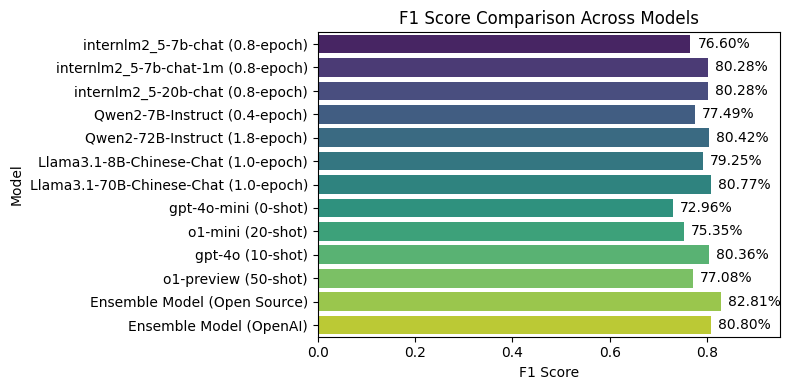

In [23]:
# plot horizontal bar chart

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.barplot(
    x="f1",
    y="model",
    data=perf_df,
    ax=ax,
    palette="viridis",
    orient="h",  # Specify horizontal orientation
)

# Add data labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_width()*100:.2f}%",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="left",
        va="center",
        xytext=(5, 0),  # Offset by 5 points horizontally
        textcoords="offset points",
    )

ax.set_title("F1 Score Comparison Across Models")
ax.set_ylabel("Model")
ax.set_xlabel("F1 Score")
ax.set_xlim(0, 0.95)

plt.tight_layout()
plt.show()

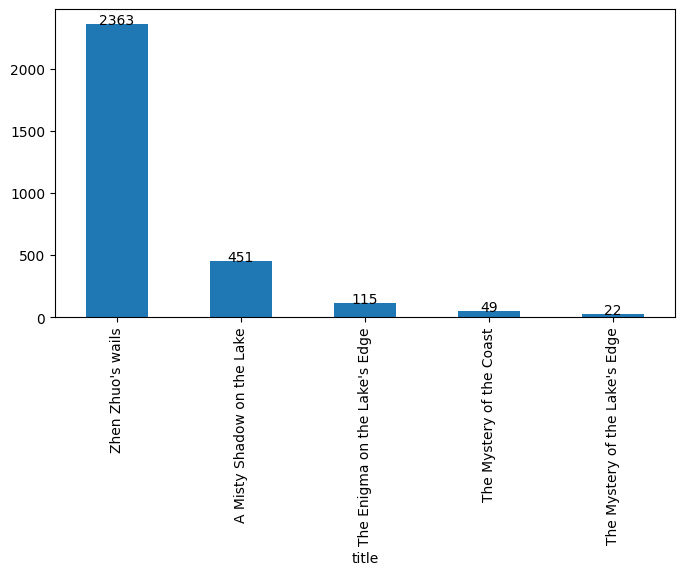

In [24]:
plot_value_counts(df_best, "title")

In [25]:
df_best["title"].value_counts().keys()

Index(['甄庄哭声', '湖畔迷影', '湖边的谜影', '海岸之谜', '湖畔之谜'], dtype='object', name='title')

In [26]:
def analyze_model(model):
    for title in df_best["title"].value_counts().keys():
        print(f"Title: {title}")
        plot_value_counts(df_best[df_best["title"] == title], model, preprocess_func=extract_answer)

Title: 甄庄哭声


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["backup"] = df[column_name]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(preprocess_func)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N

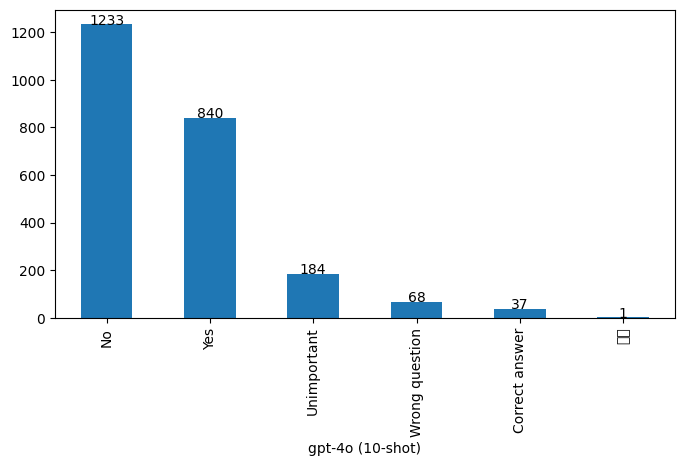

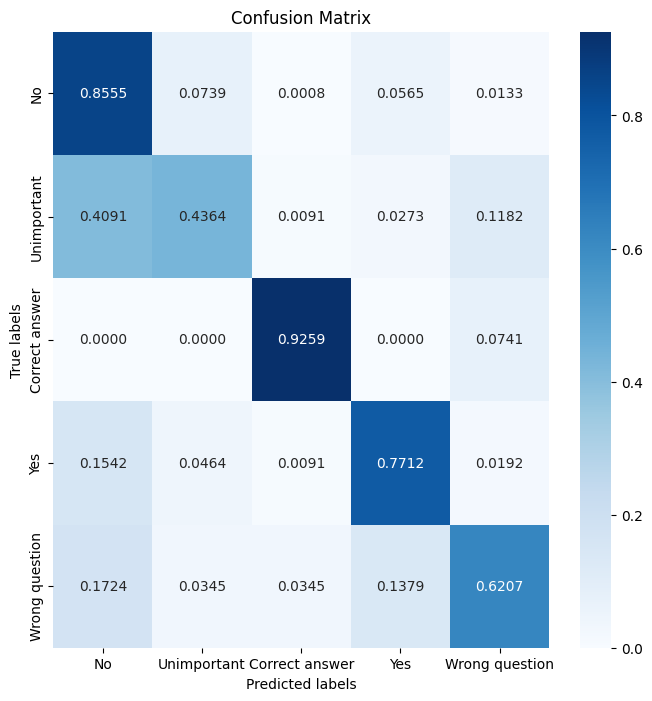

Title: 湖畔迷影


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

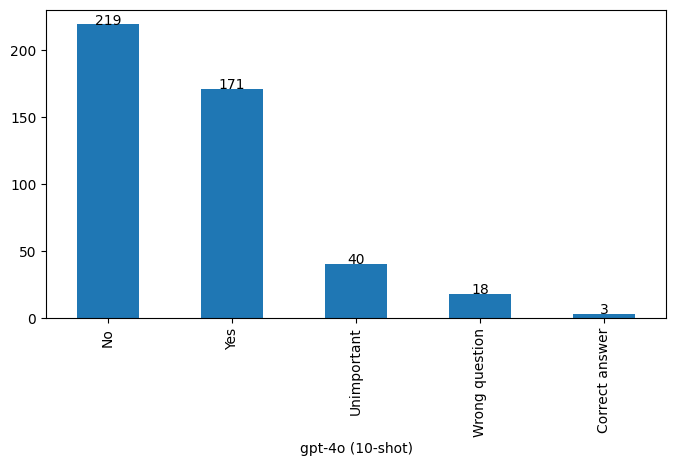

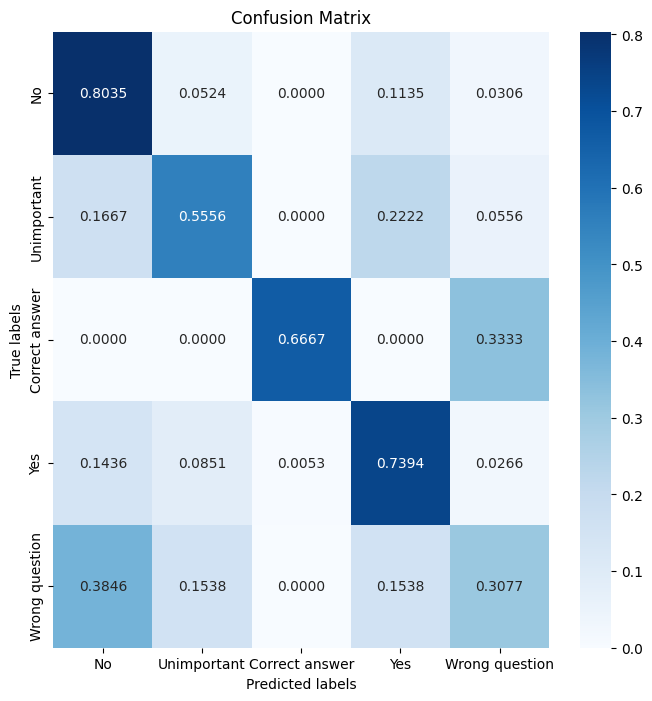

Title: 湖边的谜影


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

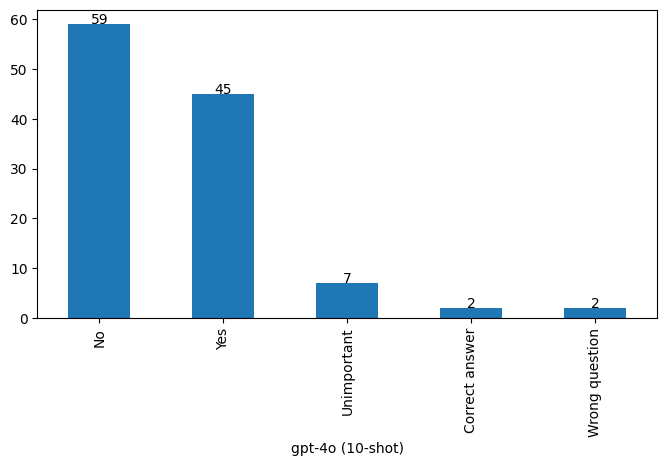

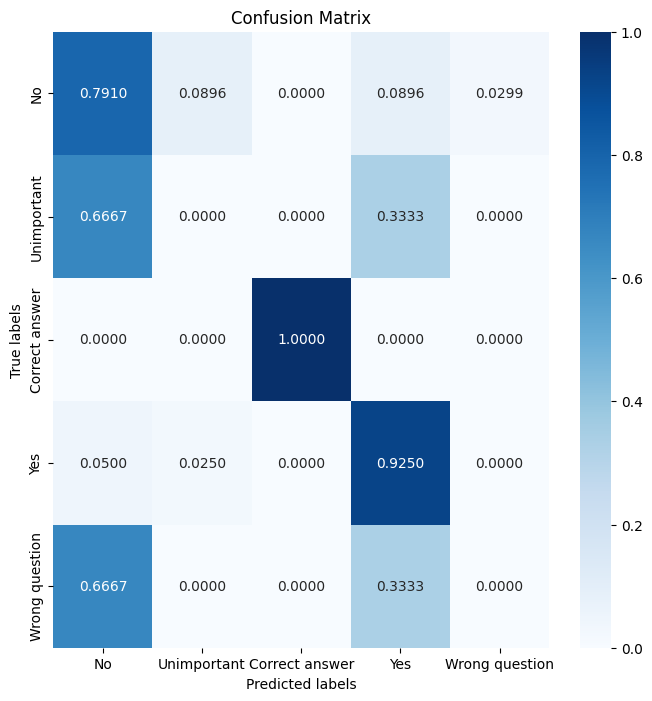

Title: 海岸之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

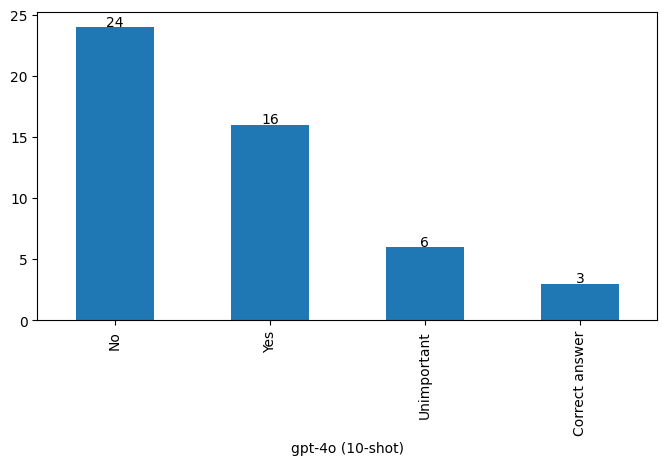

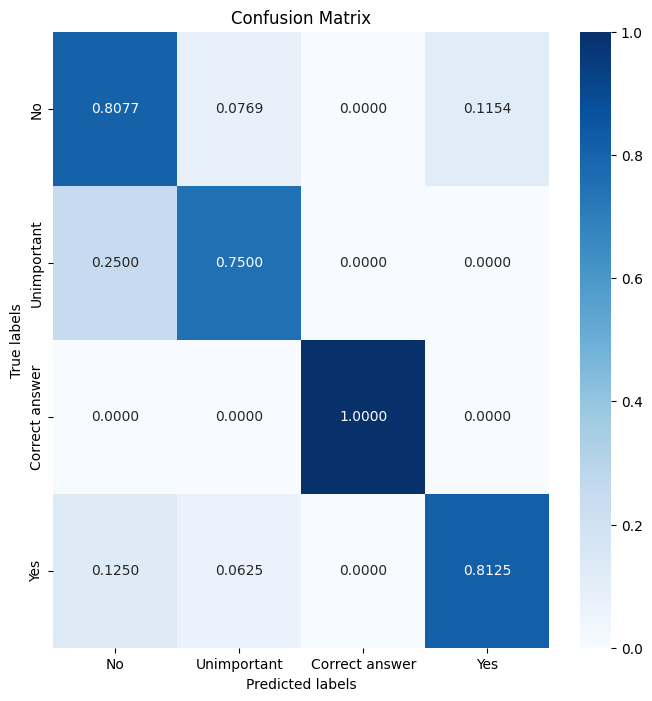

Title: 湖畔之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

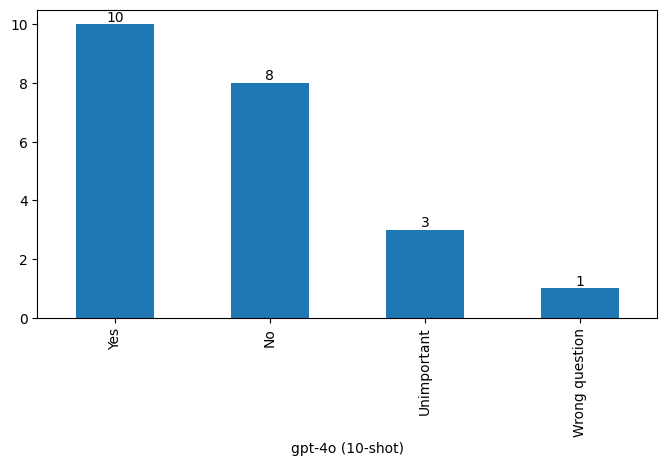

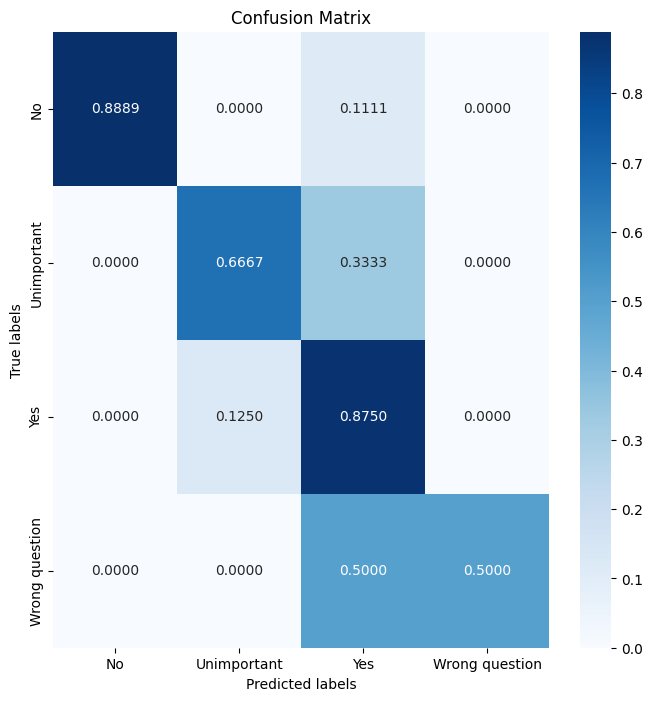

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)


In [27]:
analyze_model("gpt-4o (10-shot)")

Title: 甄庄哭声


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["backup"] = df[column_name]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(preprocess_func)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35868 (\N

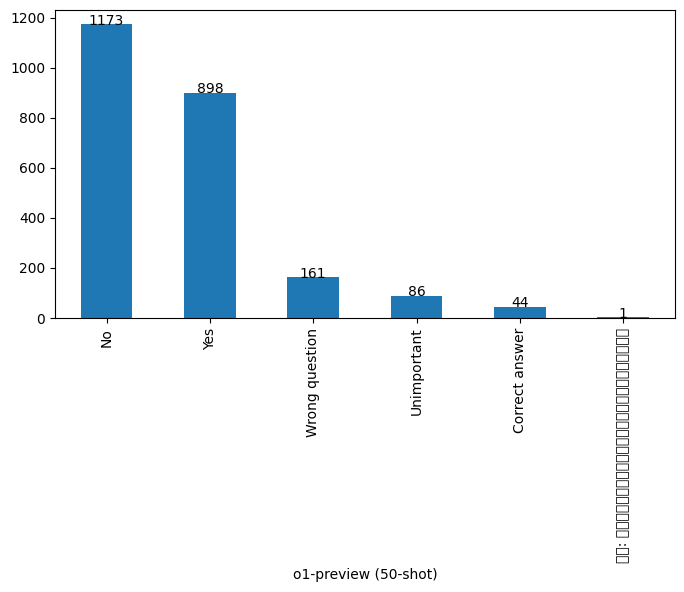

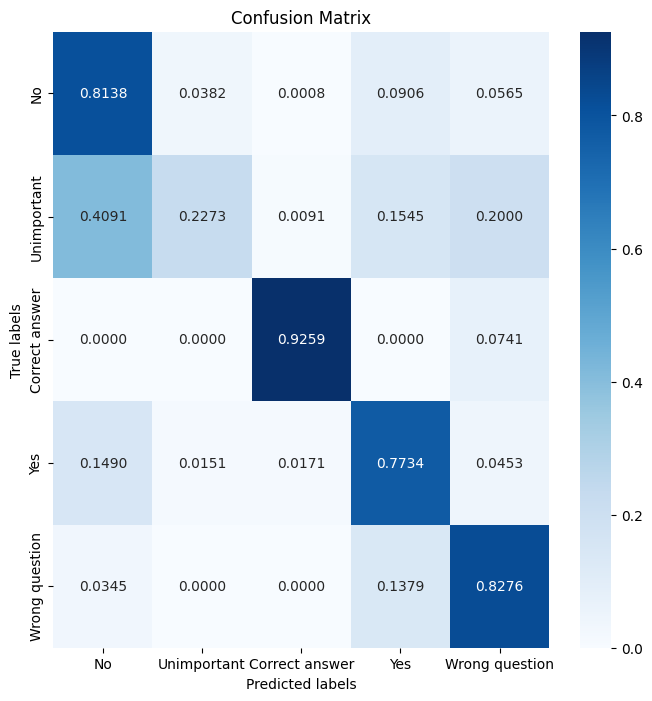

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Title: 湖畔迷影


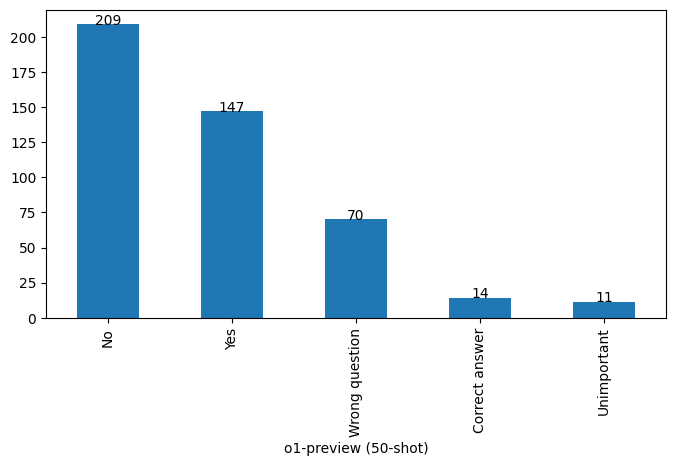

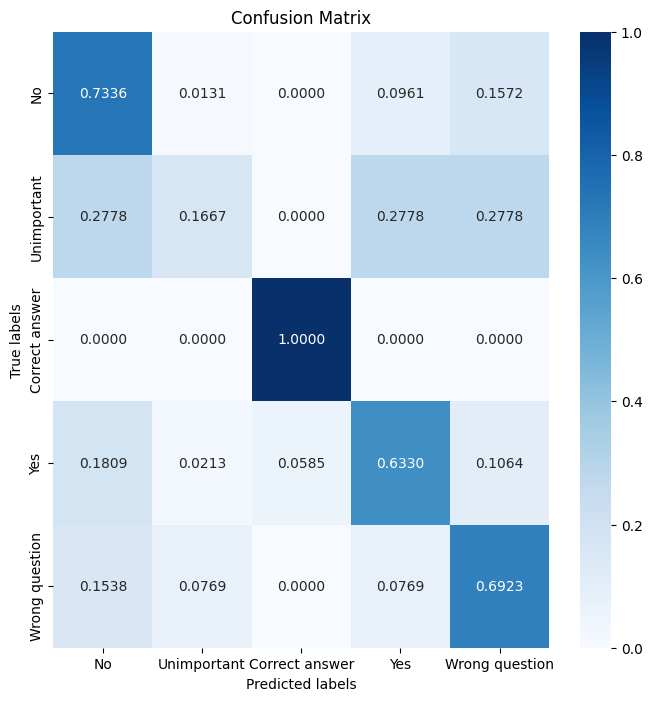

Title: 湖边的谜影


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

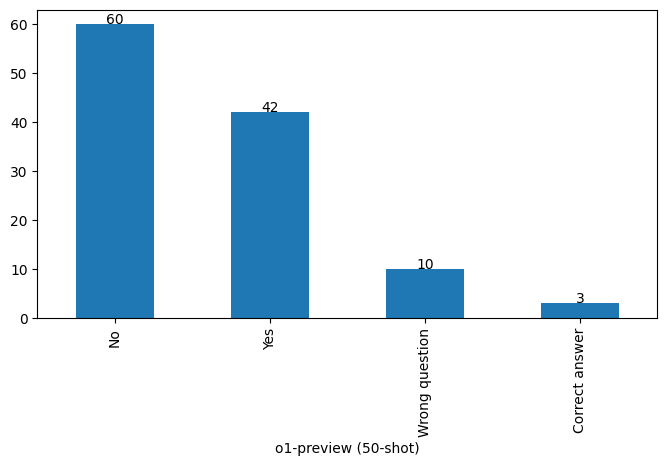

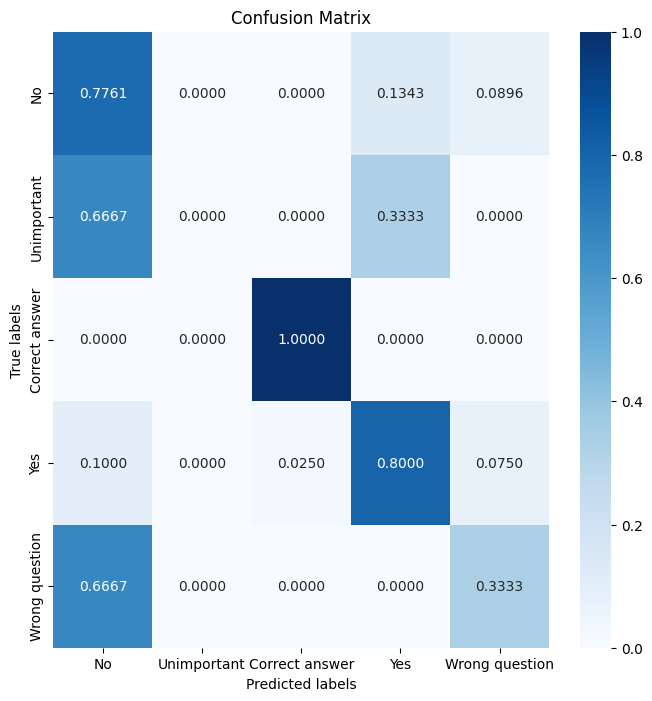

Title: 海岸之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

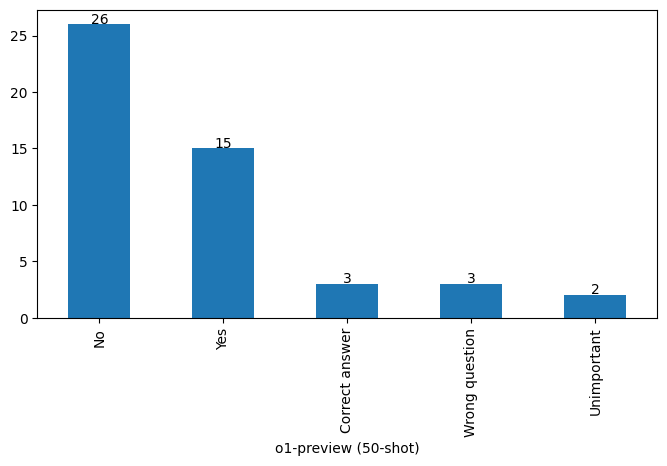

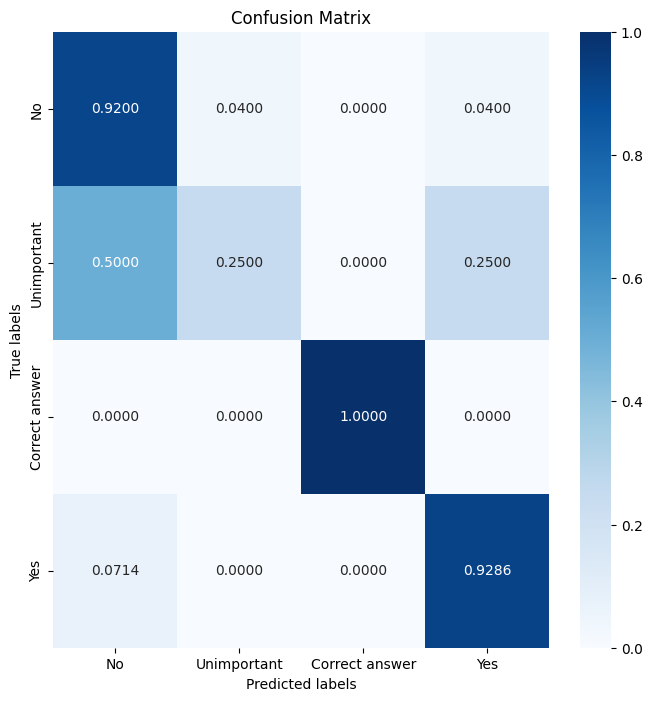

Title: 湖畔之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

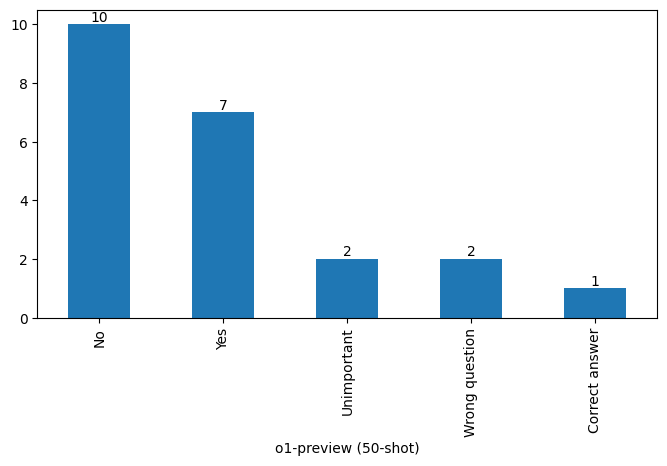

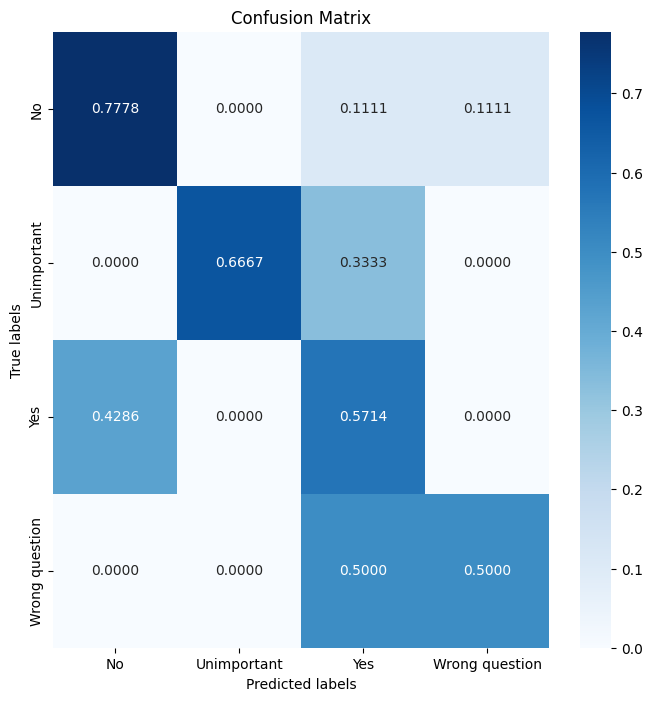

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)


In [28]:
analyze_model("o1-preview (50-shot)")

Title: 甄庄哭声


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["backup"] = df[column_name]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(preprocess_func)


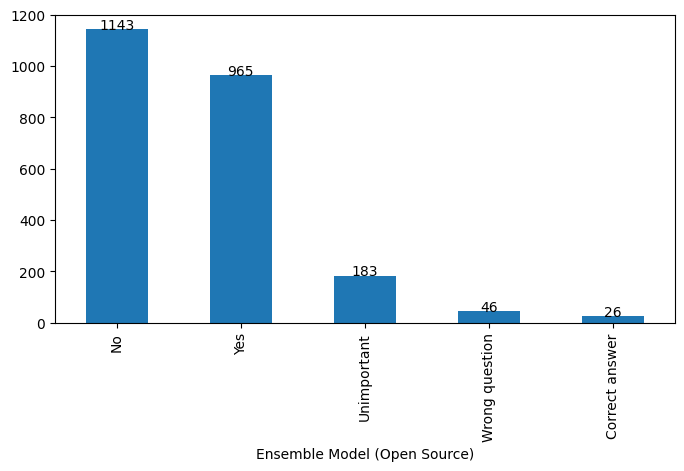

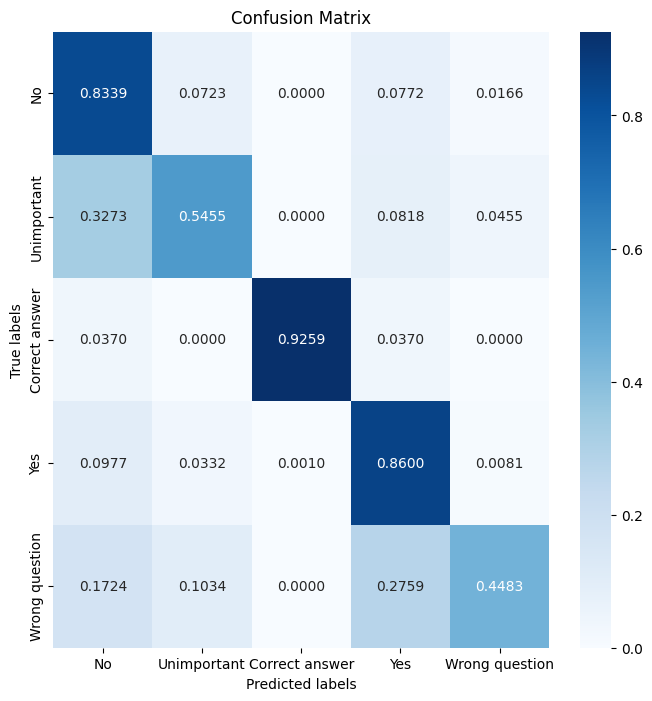

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Title: 湖畔迷影


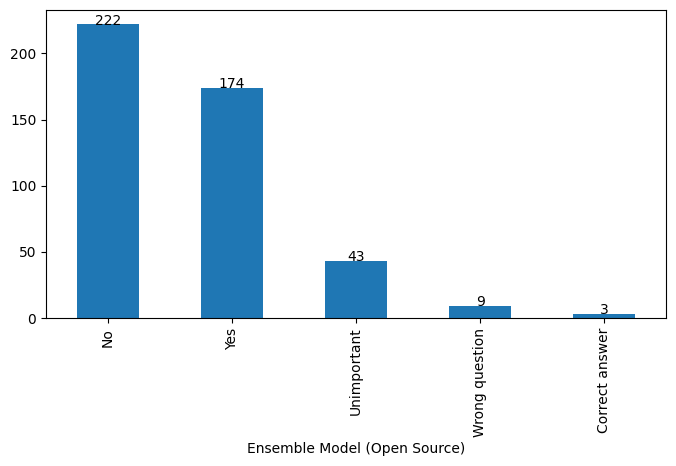

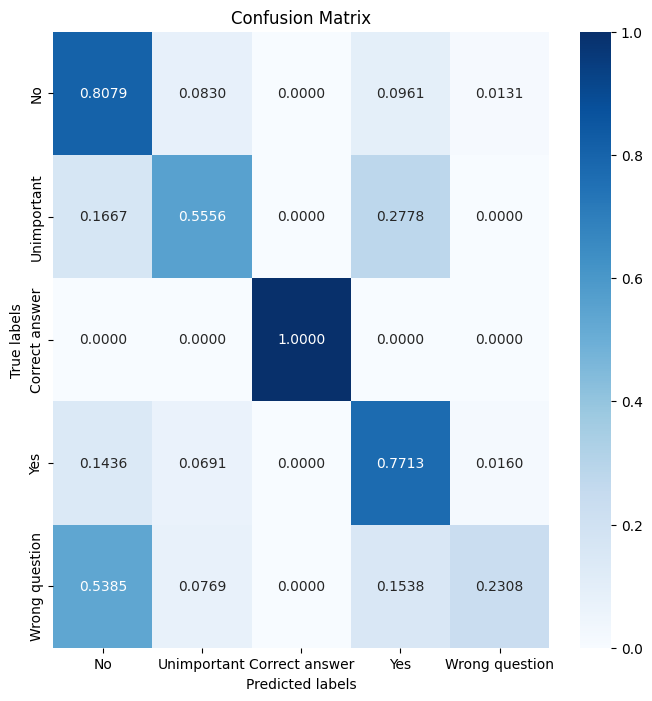

Title: 湖边的谜影


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

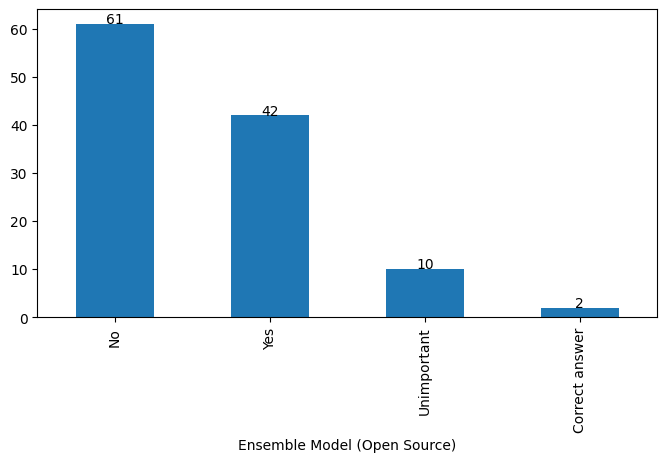

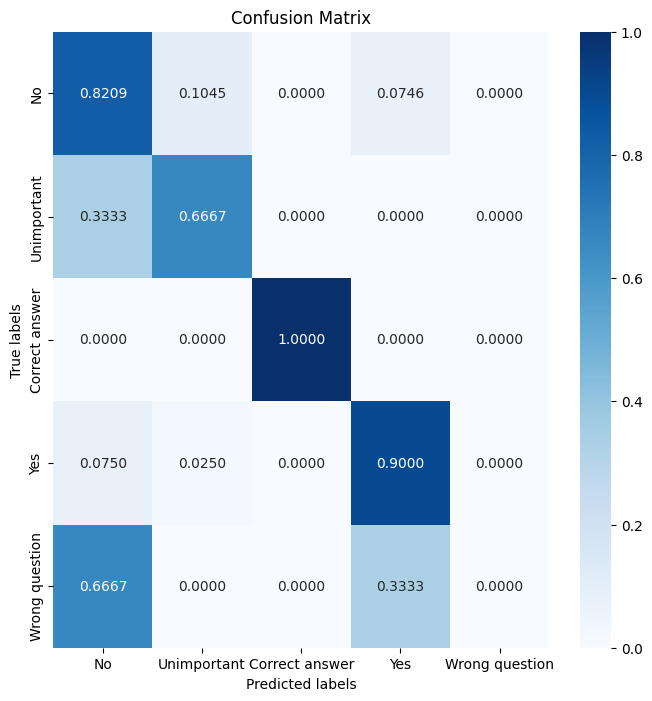

Title: 海岸之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

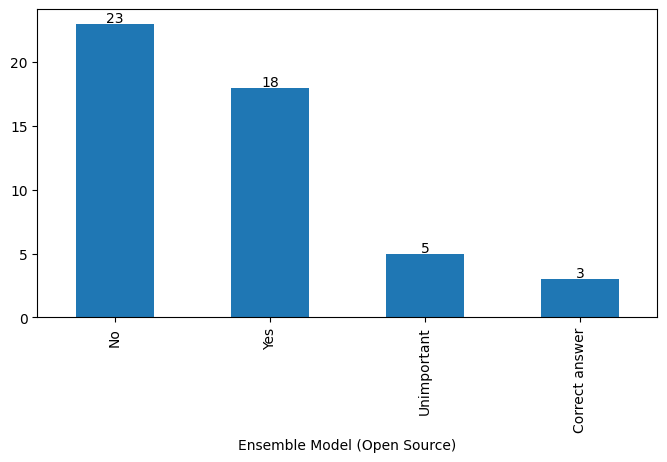

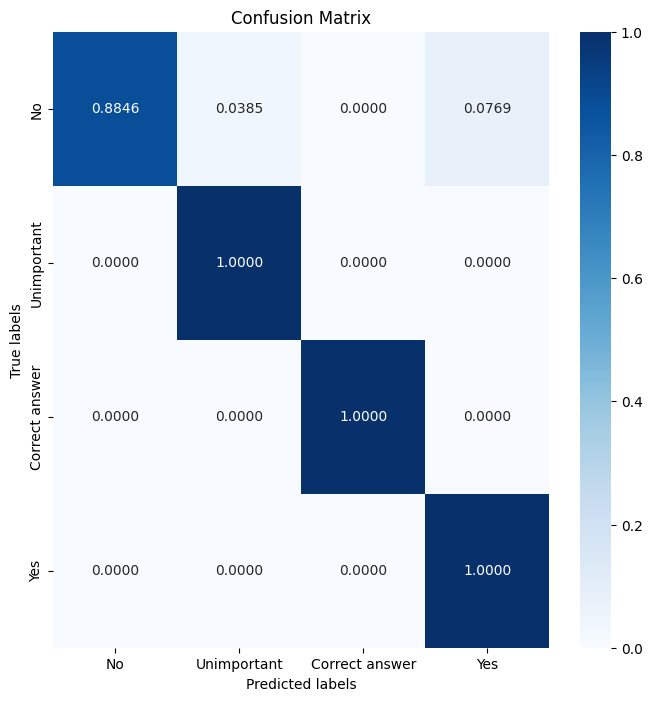

Title: 湖畔之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

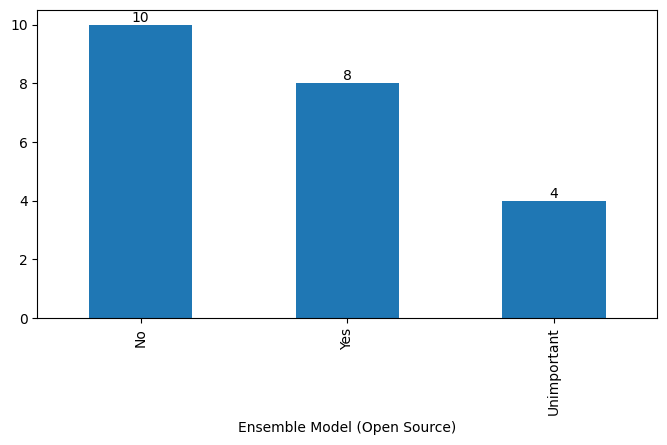

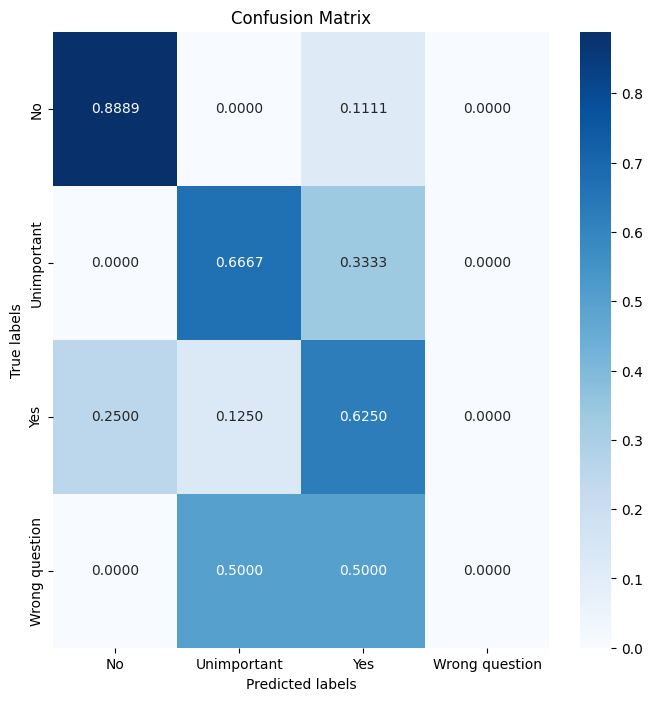

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)


In [29]:
analyze_model("Ensemble Model (Open Source)")

Title: 甄庄哭声


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["backup"] = df[column_name]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(preprocess_func)


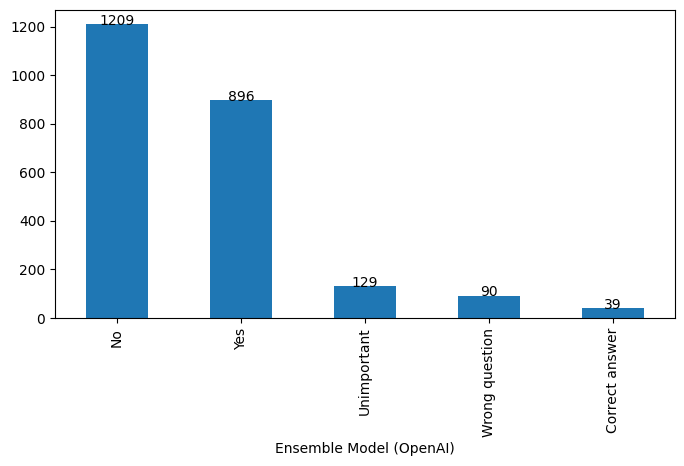

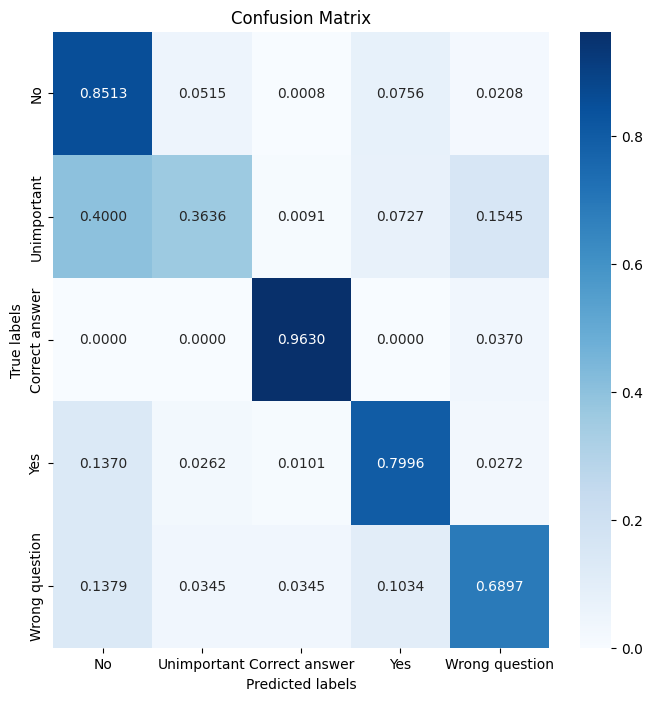

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Title: 湖畔迷影


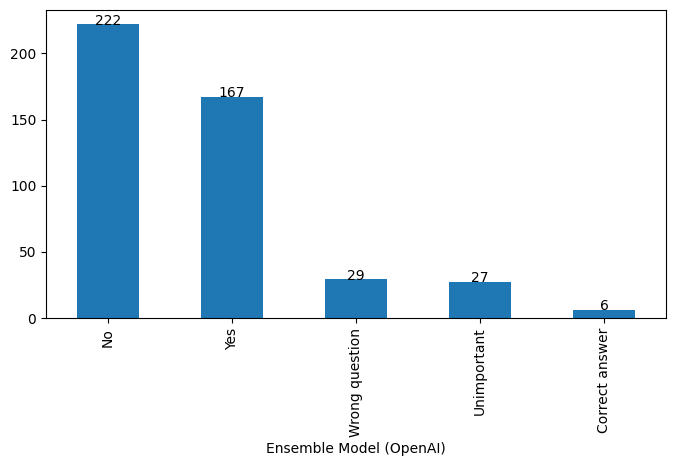

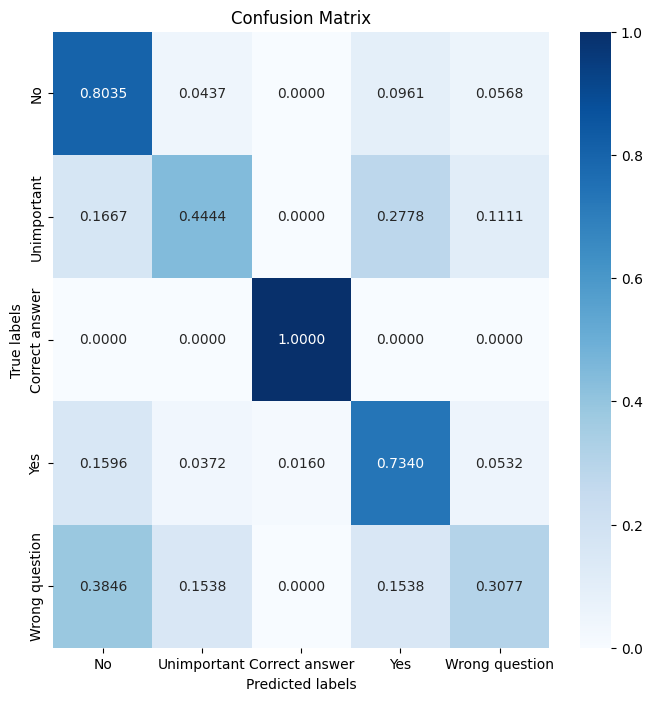

Title: 湖边的谜影


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

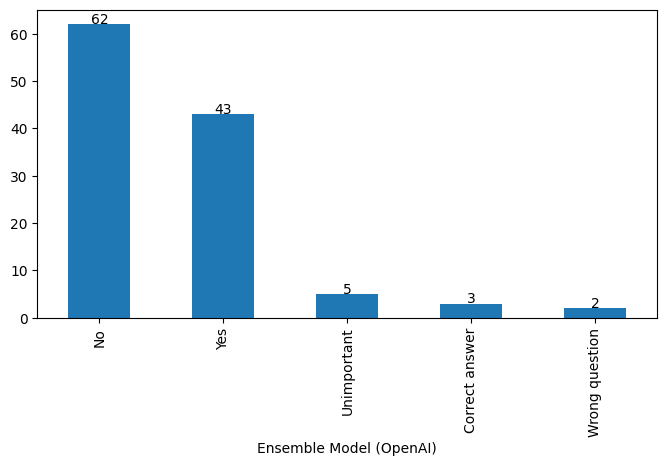

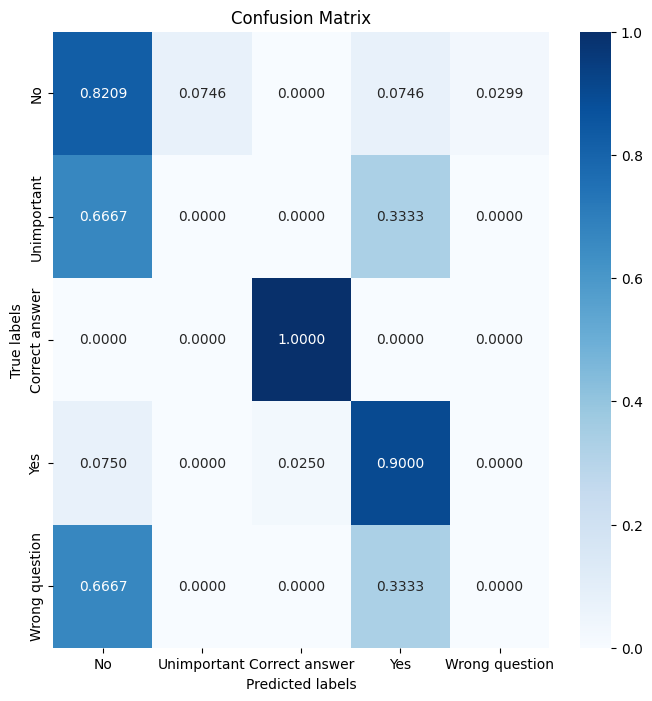

Title: 海岸之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

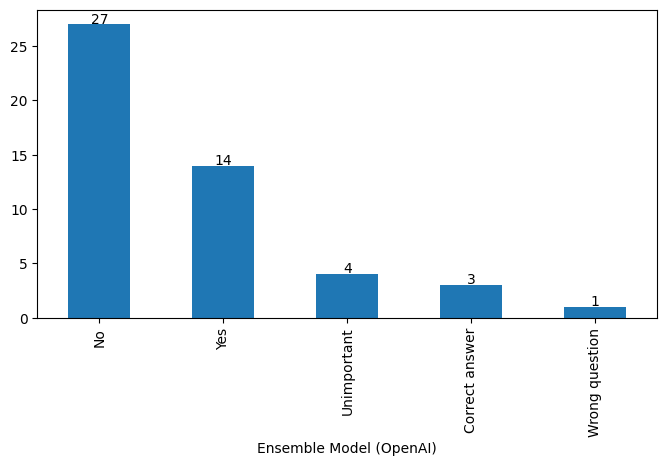

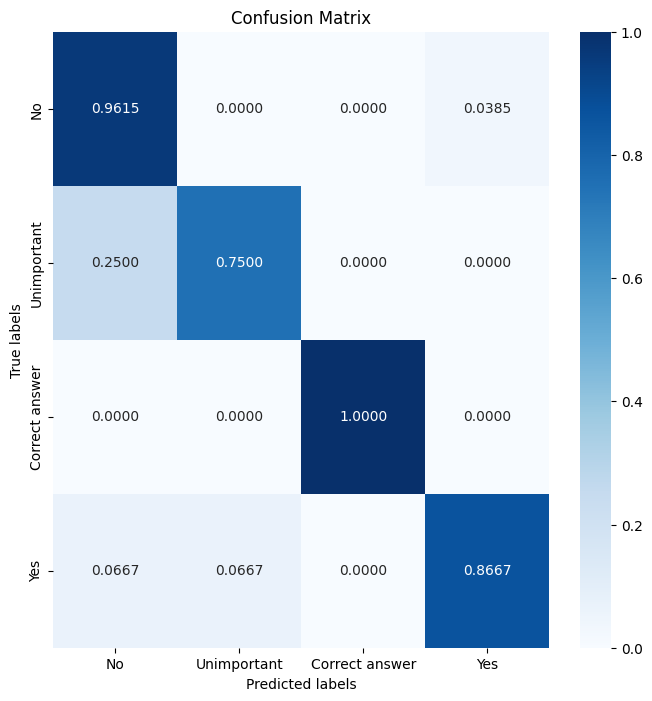

Title: 湖畔之谜


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

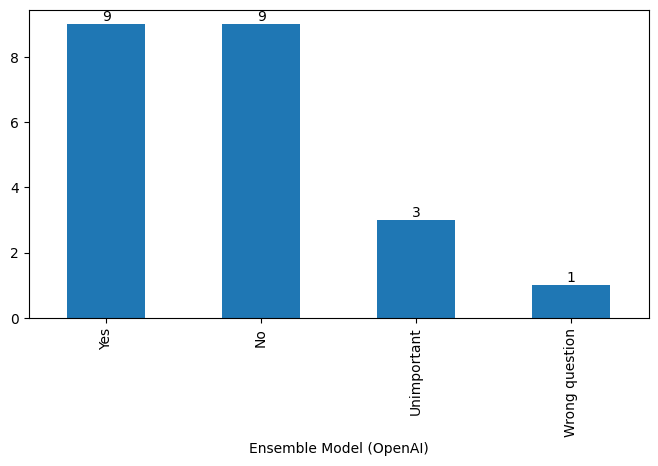

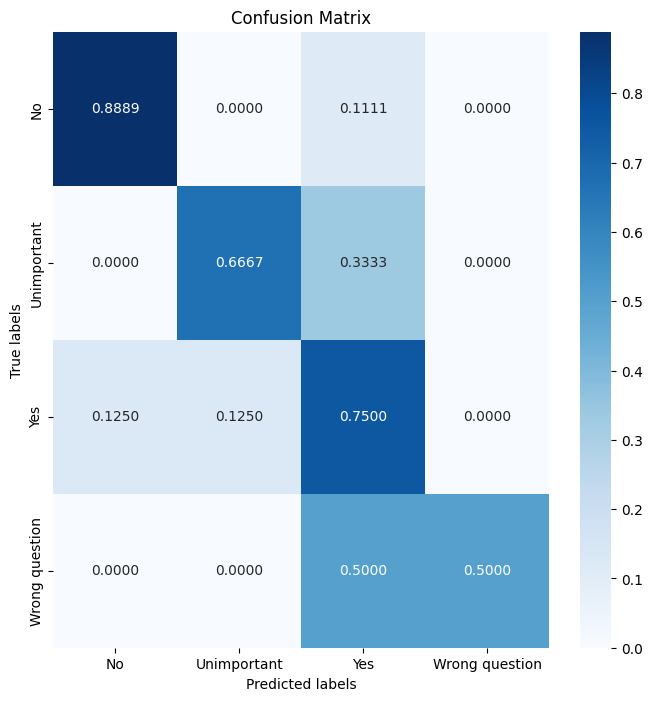

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df["backup"]
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["backup"], inplace=True)


In [30]:
analyze_model("Ensemble Model (OpenAI)")

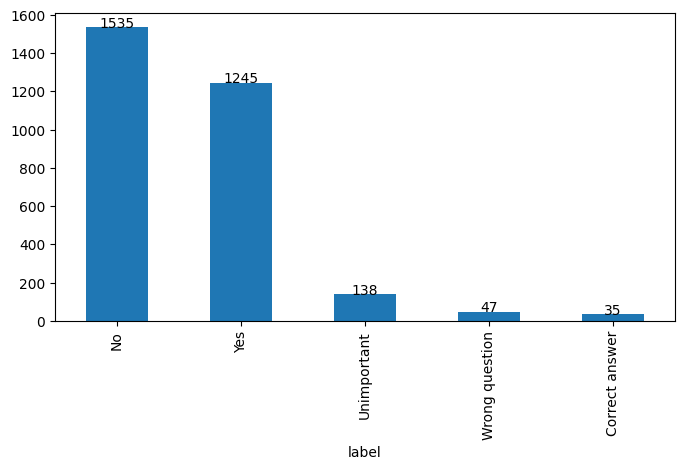

In [31]:
plot_value_counts(df_best, "label")

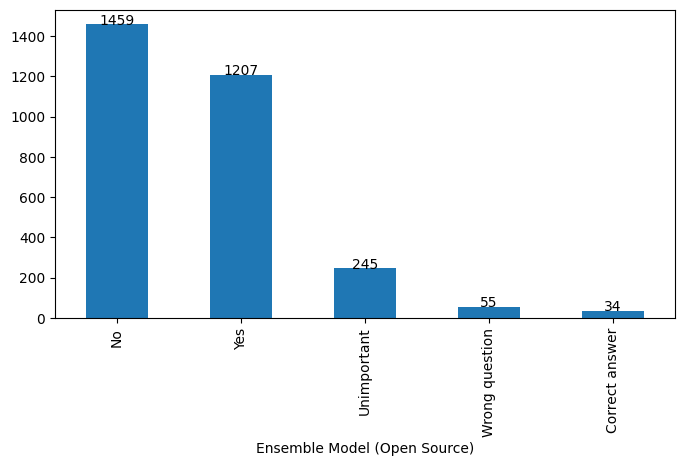

In [32]:
plot_value_counts(df_best, "Ensemble Model (Open Source)")

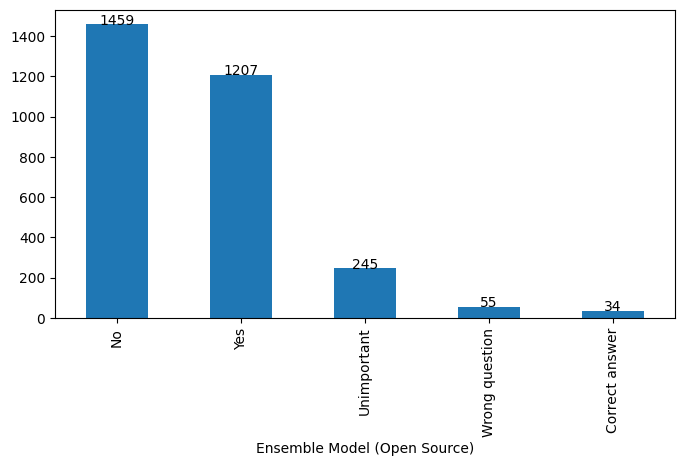

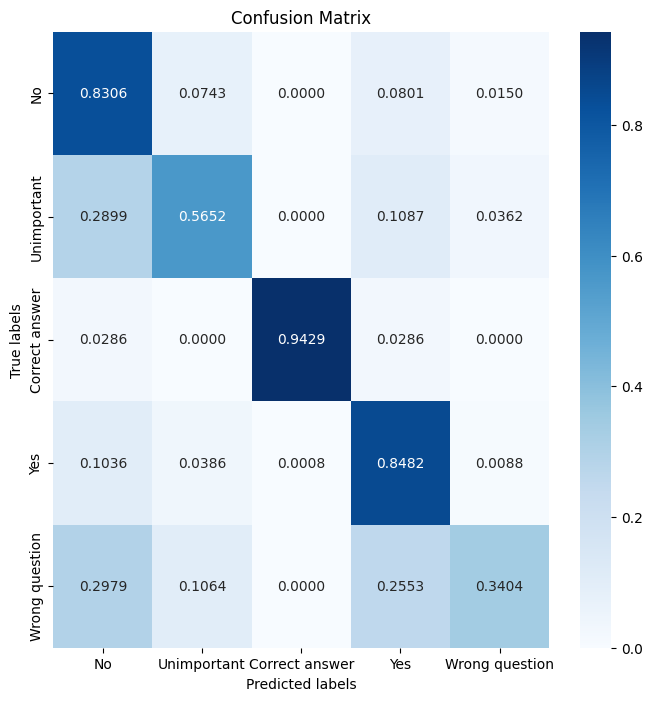

In [33]:
plot_value_counts(df_best, "Ensemble Model (Open Source)", preprocess_func=extract_answer)

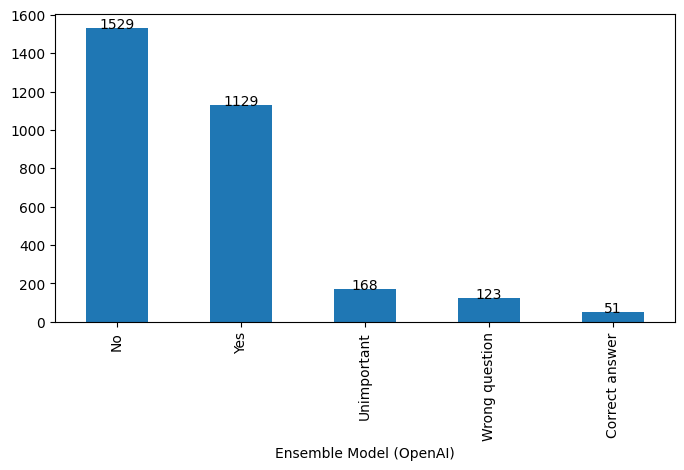

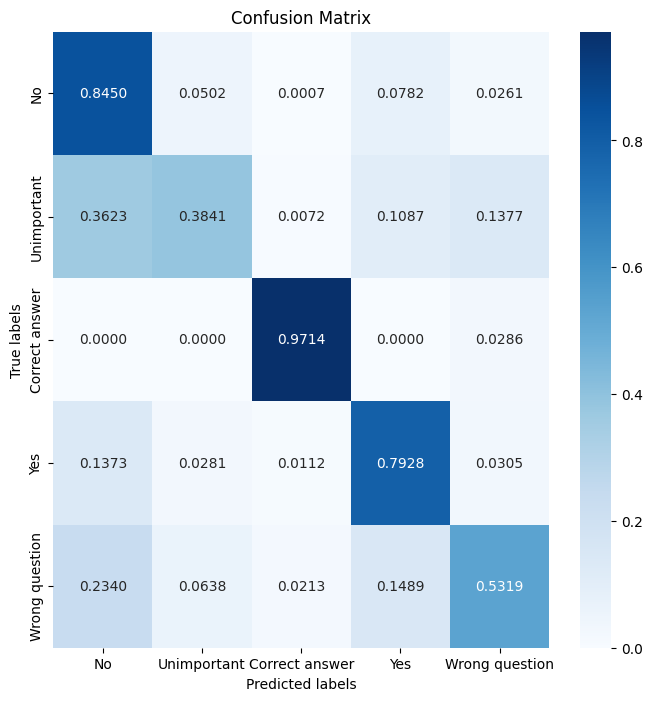

In [34]:
plot_value_counts(df_best, "Ensemble Model (OpenAI)", preprocess_func=extract_answer)

In [35]:
df_best.to_csv("data/best_results.csv", index=False)

In [36]:
perf_df.to_csv("data/best_metrics.csv", index=False)